## Random Forest - Regression

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (9,5)
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [13]:
df=pd.read_csv("car_dataset.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.350,5.590,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.750,9.540,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.250,9.850,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.850,4.150,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.600,6.870,42450,Diesel,Dealer,Manual,0


In [14]:
df.shape

(301, 9)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [16]:
df.isnull().any()

Car_Name         False
Year             False
Selling_Price    False
Present_Price    False
Kms_Driven       False
Fuel_Type        False
Seller_Type      False
Transmission     False
Owner            False
dtype: bool

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.000,2013.628,2.892,2003.000,2012.000,2014.000,2016.000,2018.000
Selling_Price,301.000,4.661,5.083,0.100,0.900,3.600,6.000,35.000
Present_Price,301.000,7.628,8.644,0.320,1.200,6.400,9.900,92.600
Kms_Driven,301.000,36947.206,38886.884,500.000,15000.000,32000.000,48767.000,500000.000
Owner,301.000,0.043,0.248,0.000,0.000,0.000,0.000,3.000


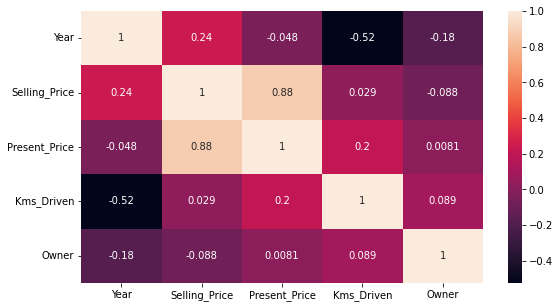

In [18]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [19]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.350,5.590,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.750,9.540,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.250,9.850,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.850,4.150,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.600,6.870,42450,Diesel,Dealer,Manual,0


In [20]:
df["vehicle_age"]=2022-df.Year

In [21]:
df.Car_Name.value_counts()

city                         26
corolla altis                16
verna                        14
fortuner                     11
brio                         10
ciaz                          9
innova                        9
i20                           9
grand i10                     8
jazz                          7
amaze                         7
Royal Enfield Classic 350     7
ertiga                        6
eon                           6
sx4                           6
alto k10                      5
i10                           5
swift                         5
Bajaj Pulsar 150              4
Royal Enfield Thunder 350     4
ritz                          4
wagon r                       4
etios liva                    4
dzire                         4
xcent                         3
etios cross                   3
Royal Enfield Thunder 500     3
TVS Apache RTR 160            3
Yamaha FZ S V 2.0             3
creta                         3
Honda CB Hornet 160R          3
etios g 

In [22]:
df.drop(columns=["Car_Name","Year"], inplace=True)

In [23]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
0,3.350,5.590,27000,Petrol,Dealer,Manual,0,8
1,4.750,9.540,43000,Diesel,Dealer,Manual,0,9
2,7.250,9.850,6900,Petrol,Dealer,Manual,0,5
3,2.850,4.150,5200,Petrol,Dealer,Manual,0,11
4,4.600,6.870,42450,Diesel,Dealer,Manual,0,8


## Train test split

In [25]:
X=df.drop("Selling_Price", axis=1)
y=df.Selling_Price

In [26]:
cat = X.select_dtypes("object").columns
cat

Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

In [27]:
X[cat].head()

,Fuel_Type,Seller_Type,Transmission
0,Petrol,Dealer,Manual
1,Diesel,Dealer,Manual
2,Petrol,Dealer,Manual
3,Petrol,Dealer,Manual
4,Diesel,Dealer,Manual


In [29]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()
X[cat] = enc.fit_transform(X[cat])
X.head()

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
0,5.590,27000,2.000,0.000,1.000,0,8
1,9.540,43000,1.000,0.000,1.000,0,9
2,9.850,6900,2.000,0.000,1.000,0,5
3,4.150,5200,2.000,0.000,1.000,0,11
4,6.870,42450,1.000,0.000,1.000,0,8


In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=101)

print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)


Train features shape :  (240, 7)
Train target shape   :  (240,)
Test features shape  :  (61, 7)
Test target shape    :  (61,)


## Modeling for Random Forest

In [35]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

def train_val(model, X_train, y_train, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [37]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=101)
rf_model.fit(X_train,y_train)
train_val(rf_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.988,0.776
mae,0.239,0.652
mse,0.366,2.149
rmse,0.605,1.466


In [38]:
from sklearn.model_selection import cross_validate, cross_val_score
model = RandomForestRegressor(random_state=101)
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)
df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

test_r2                             0.883
test_neg_mean_absolute_error       -0.700
test_neg_mean_squared_error        -3.160
test_neg_root_mean_squared_error   -1.470
dtype: float64

## Feature Importances

In [39]:
rf_model.feature_importances_

array([8.96025335e-01, 1.65948426e-02, 4.11498585e-03, 4.32823208e-03,
       3.62611964e-03, 1.45847525e-05, 7.52958999e-02])

In [41]:
df_f_i = pd.DataFrame(index=X.columns, data = rf_model.feature_importances_, 
                      columns = ["Feature Importance"]).sort_values("Feature Importance", ascending=False)
df_f_i

,Feature Importance
Present_Price,0.896
vehicle_age,0.075
Kms_Driven,0.017
Seller_Type,0.004
Fuel_Type,0.004
Transmission,0.004
Owner,0.000


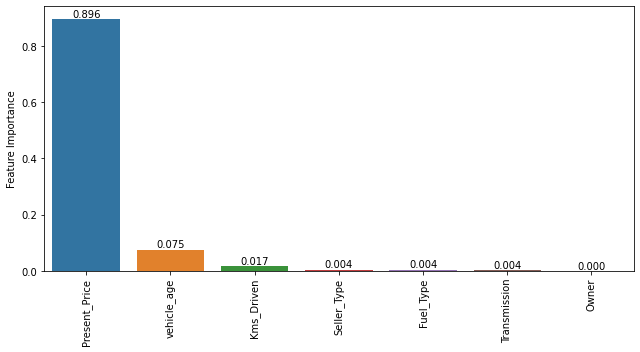

In [43]:
ax =sns.barplot(x = df_f_i.index, y = 'Feature Importance', data = df_f_i)
ax.bar_label(ax.containers[0],fmt="%.3f")
plt.xticks(rotation = 90)
plt.tight_layout()

## Visualizing trees

In [52]:
from sklearn.tree import plot_tree

def report_model(model, number_of_tree):
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    print('\n')
    print(train_val(model, X_train, y_train, X_test, y_test))
    print('\n')
    plt.figure(figsize=(12,8),dpi=100)
    plot_tree(model.estimators_[number_of_tree],filled=True, feature_names=X.columns, fontsize=8);

In [53]:
pruned_tree = RandomForestRegressor(n_estimators=250, max_depth=4, random_state=101)
pruned_tree.fit(X_train,y_train)

RandomForestRegressor(max_depth=4, n_estimators=250, random_state=101)

In [ ]:
# feature a sorular sorarak ayni fiyatli arabalri kümelemeye calisiyor 

In [ ]:
# max_features = auto,  bütün featurelari kullaniyor. sinir koymanin sonuclara kötü etkisi var.
# burda sadece gözlemleri random seciyor 
# bootstrap : True 3te 2sini aliyor gözlemlerin



      train  test
R2    0.967 0.730
mae   0.586 0.824
mse   0.969 2.590
rmse  0.984 1.609




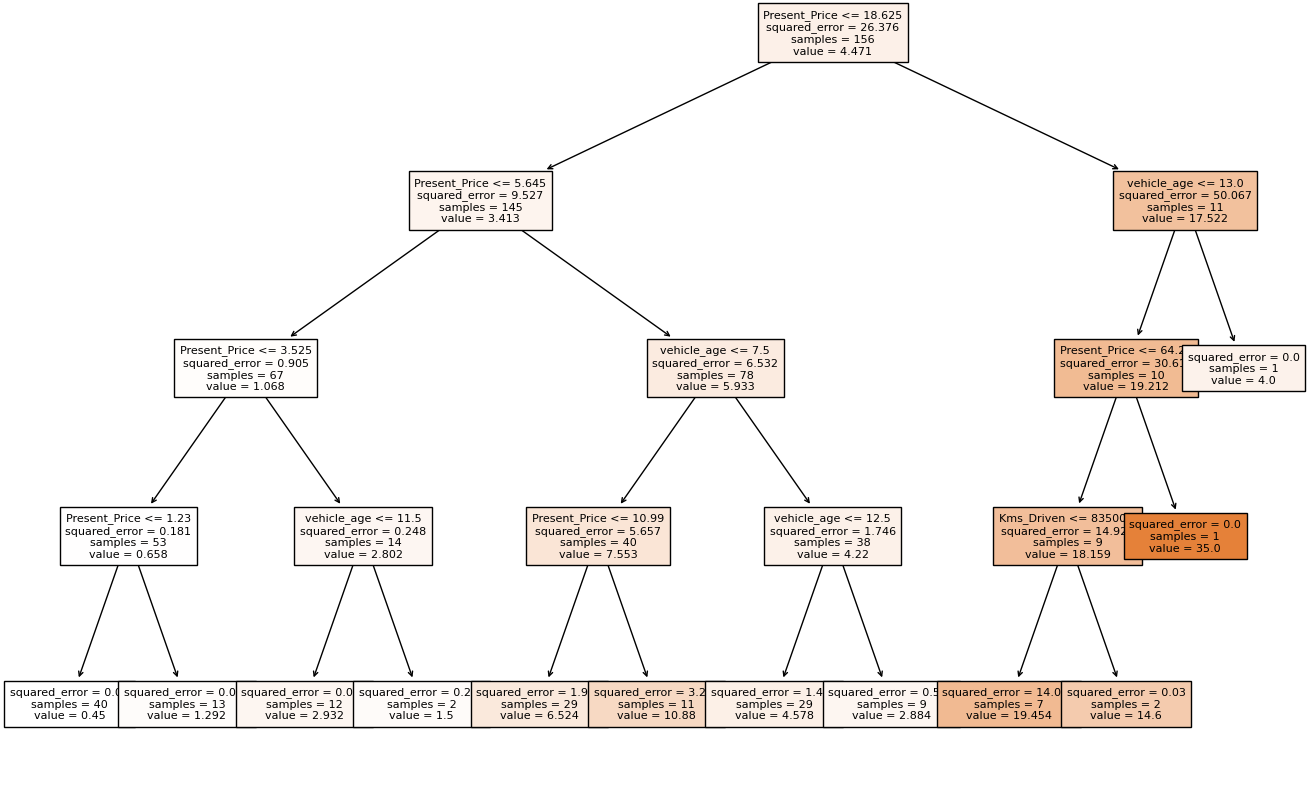

In [54]:
report_model(pruned_tree, 2)

## GridSearch

In [63]:
from sklearn.model_selection import GridSearchCV

In [64]:
model = RandomForestRegressor(random_state=101)

In [65]:
param_grid = {"n_estimators":[64, 128, 200],
              "max_depth": [None, 4, 5, 6],
              "min_samples_leaf": [1, 2, 3],
              "min_samples_split": [2, 3, 5],
              "max_features":['auto', X.shape[1]/3, 3]}

In [66]:

grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [67]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=101),
             n_jobs=-1,
             param_grid={'max_depth': [None, 4, 5, 6],
                         'max_features': ['auto', 2.3333333333333335, 2],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': [64, 128, 200]},
             scoring='neg_root_mean_squared_error')

In [68]:
grid_model.best_estimator_

RandomForestRegressor(n_estimators=200, random_state=101)

In [69]:
grid_model.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [70]:
grid_model.best_score_

-1.4520896434226362

In [71]:
train_val(grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.987,0.779
mae,0.238,0.643
mse,0.384,2.123
rmse,0.619,1.457


In [72]:
from sklearn.model_selection import cross_validate, cross_val_score

model = RandomForestRegressor(random_state=101, n_estimators= 200)

scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv = 10)
df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

test_r2                             0.885
test_neg_mean_absolute_error       -0.694
test_neg_mean_squared_error        -3.043
test_neg_root_mean_squared_error   -1.452
dtype: float64

## Feature Selection

In [81]:
X2 = X[["Present_Price", "vehicle_age", "Kms_Driven"]]

In [82]:
X_train,X_test,y_train,y_test=train_test_split(X2, y,test_size=0.2, random_state=101)

In [83]:
rf_model = RandomForestRegressor(random_state=101)
rf_model.fit(X_train,y_train)
train_val(rf_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.987,0.778
mae,0.258,0.661
mse,0.392,2.132
rmse,0.626,1.460


In [84]:
model = RandomForestRegressor(random_state=101)
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv = 10)
df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

test_r2                             0.888
test_neg_mean_absolute_error       -0.739
test_neg_mean_squared_error        -3.086
test_neg_root_mean_squared_error   -1.492
dtype: float64

In [85]:
model = RandomForestRegressor(random_state=101)

param_grid = {"n_estimators":[64, 128, 200],
              "max_depth": [None, 4, 5, 6],
              "min_samples_leaf": [1, 2, 3],
              "min_samples_split": [2, 3, 5],
              "max_features":['auto', 2, 3]}

grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

grid_model.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=101),
             n_jobs=-1,
             param_grid={'max_depth': [None, 4, 5, 6],
                         'max_features': ['auto', 2, 3],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': [64, 128, 200]},
             scoring='neg_root_mean_squared_error')

In [86]:
grid_model.best_estimator_

RandomForestRegressor(min_samples_split=3, n_estimators=200, random_state=101)

In [87]:
grid_model.best_score_

-1.487348823235666

In [88]:
train_val(grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.985,0.763
mae,0.285,0.656
mse,0.449,2.274
rmse,0.670,1.508


In [89]:
model = RandomForestRegressor(min_samples_split=3, n_estimators=200, random_state=101)
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv = 10)
df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

test_r2                             0.888
test_neg_mean_absolute_error       -0.734
test_neg_mean_squared_error        -3.076
test_neg_root_mean_squared_error   -1.487
dtype: float64

In [ ]:
# hemen hemen ayni sonuclar geldi daha az feature la daha az kompleks bi data  kullanmak mantikli

## Final Model

In [116]:
X2.head()

,Present_Price,vehicle_age,Kms_Driven
0,5.590,8,27000
1,9.540,9,43000
2,9.850,5,6900
3,4.150,11,5200
4,6.870,8,42450


In [99]:
cat

Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

In [109]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import make_column_transformer

column_trans = make_column_transformer((OrdinalEncoder(), []), remainder="passthrough")

In [ ]:
# [] categorik verilere hicbir islem yapmayack demektir.ignore edecek. 
# gelen veride orijinal veri gibi 7 feature ile gelirse diye OrdianalEncoder() yazmak zorundayz

In [119]:
pd.DataFrame(column_trans.fit_transform(X2)).head()

,0,1,2
0,5.590,8.000,27000.000
1,9.540,9.000,43000.000
2,9.850,5.000,6900.000
3,4.150,11.000,5200.000
4,6.870,8.000,42450.000


In [ ]:
# owner sütununa islem yapmiyor egitim 3 featurela gerceklesiyor. o yuzden o da ignore edilecek

In [120]:
from sklearn.pipeline import Pipeline

operations = [("transformer", column_trans), ("RF", RandomForestRegressor(n_estimators=200, random_state=101))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X2, y)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(), [])])),
                ('RF',
                 RandomForestRegressor(n_estimators=200, random_state=101))])

## Prediction

In [121]:
samples = {"Present_Price": [7, 9.5],
           "Kms_Driven": [25000, 44000],
           "Fuel_Type":["Petrol", "Diesel"],
           'Seller_Type':['Dealer', 'Individual'],
           'Transmission': ['Manual', 'Automatic'],
           "Owner":[0,1],
           "vehicle_age":[1, 9]}

In [122]:
df_samples = pd.DataFrame(samples)
df_samples

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
0,7.000,25000,Petrol,Dealer,Manual,0,1
1,9.500,44000,Diesel,Individual,Automatic,1,9


In [123]:
pipe_model.predict(df_samples)

array([5.5385, 5.2615])

In [125]:
pd.DataFrame(column_trans.transform(df_samples))

,0,1,2
0,7.000,1.000,25000.000
1,9.500,9.000,44000.000
